Dataset Link - https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [15]:
data = pd.read_csv("D:\\Internship 1st\\Assignment 1\\disease_diagnosis\\framingham.csv")
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [16]:
data.shape

(4238, 16)

In [17]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [18]:
data.dropna(inplace = True)

In [19]:
data.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

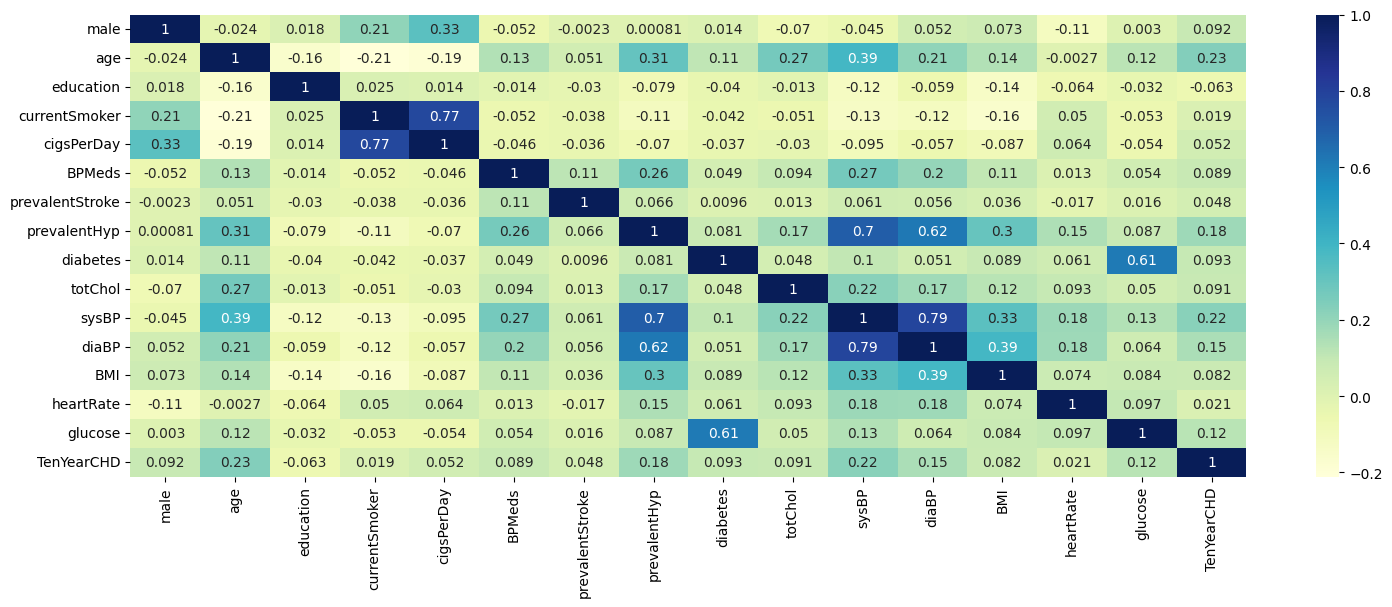

In [20]:
plt.figure(figsize=(18, 6))
sns.heatmap(data.corr(),cmap="YlGnBu", annot = True)
plt.show()

In [21]:
feature_cols = ['male'	,'age',	'education',	'currentSmoker'	,'cigsPerDay'	,'BPMeds'	,'prevalentStroke'
               ,'prevalentHyp'	,'diabetes'	,'totChol'	,'sysBP'	,'diaBP', 'BMI',	'heartRate' ,
               'glucose']
X = data[feature_cols]
y = data['TenYearCHD']

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3 , random_state = 50)

In [23]:
# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
model = LogisticRegression()
model.fit (X_train,y_train)

c:\Users\deepa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
y_predict = model.predict(X_test)

In [26]:
train_model_score = model.score(X_train,y_train)
print (f"model score in Training data is {train_model_score}%")

model score in Training data is 0.8538491598280579%


In [27]:
testing_model_score = model.score(X_test,y_test)
print (f"model score in Testing data is {testing_model_score}%")

model score in Testing data is 0.8395624430264357%


In [28]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

Confusion Matrix:
 [[673 245]
 [ 90  89]]


c:\Users\deepa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [29]:
predicted_val = model.predict([[0	,46	,3.0,	1,	23.0,0.0,	0	,0	,0	,285.0
                                ,130.0	,84.0	,23.10	,85.0	,85.0]])
print(predicted_val)

[0]


c:\Users\deepa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
